In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\titles.csv')
titles.head()

,title,year
0,A Trip to the Moon,2017
1,My Wife's Relatives,1939
2,Passione d'amore,1981
3,Purple Day,1999
4,Sud Side Stori,2000


In [4]:
cast = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

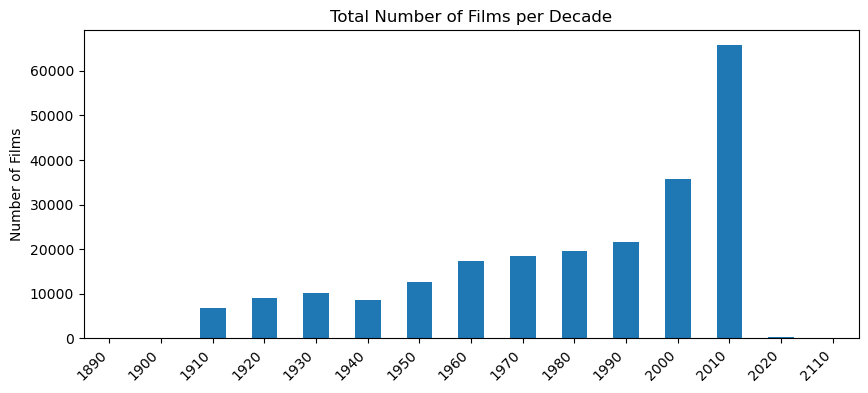

In [5]:
titles['decade'] = (titles['year'] // 10) * 10
total_films = (titles.groupby('decade')['title']
               .size().
               plot(kind='bar', 
                    xlabel='', 
                    ylabel='Number of Films', 
                    title='Total Number of Films per Decade', 
                    figsize=(10, 4)))
plt.xticks(rotation=45, ha='right')
plt.show()

### Use groupby() to plot the number of "Hamlet" films made each decade.

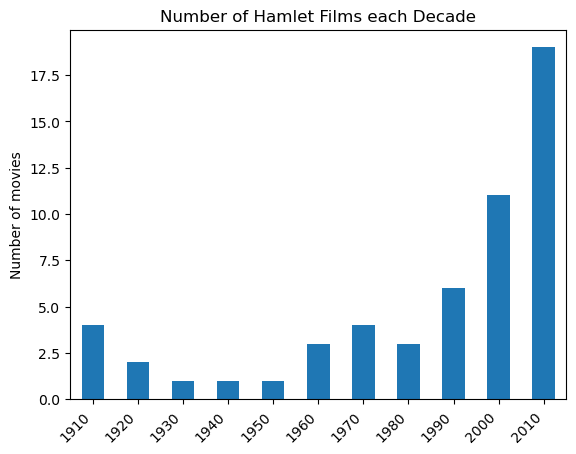

In [6]:
hamlet_films = titles.loc[titles['title'].str.contains('hamlet', case=False, na=False)]
hamlet_decade = (hamlet_films.groupby('decade')['title']
                 .count()
                 .plot(kind='bar', 
                       xlabel='', 
                       ylabel='Number of movies', 
                       title='Number of Hamlet Films each Decade'))
plt.xticks(rotation=45, ha='right')
plt.show()

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

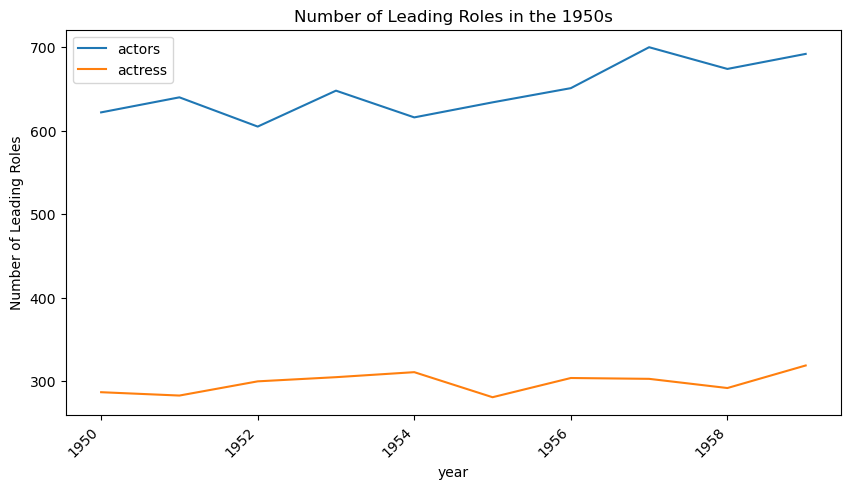

In [7]:
n1_roles = (
    cast.loc[(cast['n'] == 1) & (cast['year'].between(1950, 1959))]
    .groupby(['type', 'year'])
    .agg(count=('n', 'count'))
    .unstack('type')
    .plot(kind='line', figsize=(10, 5)))
plt.ylabel('Number of Leading Roles')
plt.title('Number of Leading Roles in the 1950s')
plt.xticks(rotation=45, ha='right')
plt.legend(('actors', 'actress'))
plt.show()

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [8]:
cast['decade'] = cast['year'] // 10 * 10
cast

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0,1980
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0,2000
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0,1980
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0,2000


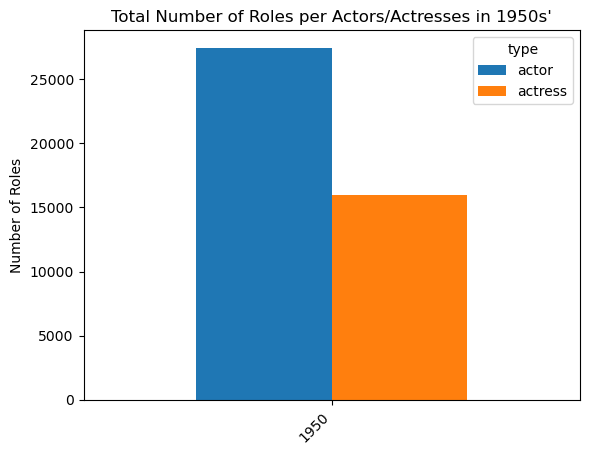

In [9]:
roles_1950s = (cast.loc[(cast['n'].between(1, 5)) & (cast['decade'] == 1950)])
roles_1950s_agg = (
    roles_1950s.pivot_table(index='decade', 
                            columns='type', 
                            values='n', 
                            aggfunc='count'))
ax = roles_1950s_agg.plot(kind='bar', width=0.6)
plt.xlabel(' ')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Roles')
plt.title("Total Number of Roles per Actors/Actresses in 1950s'")
ax.legend(title='type')
plt.show()



### Use groupby() to determine how many roles are listed for each movie named _The Pink Panther_.

In [31]:
pink_panther_roles = (
    cast.loc[cast['title'] == 'The Pink Panther']
    .groupby('title')['character']
    .count()
    .reset_index())
print(pink_panther_roles)

              title  character
0  The Pink Panther        111


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [ ]:
frank_oz_roles = (
    cast.loc[cast['name'] == 'Frank Oz']
    .groupby(['title', 'name'])['character']
    .count()
    .reset_index(name='role_count')
    )
frank_oz_multi_roles = frank_oz_roles.loc[frank_oz_roles['role_count'] >= 2]
print(frank_oz_multi_roles)

                                   title      name  role_count
1                       Follow That Bird  Frank Oz           3
5                 Muppet Treasure Island  Frank Oz           4
6                     Muppets from Space  Frank Oz           4
16  The Adventures of Elmo in Grouchland  Frank Oz           3
18                      The Dark Crystal  Frank Oz           2
20                The Great Muppet Caper  Frank Oz           6
21            The Muppet Christmas Carol  Frank Oz           7
22                      The Muppet Movie  Frank Oz           8
23            The Muppets Take Manhattan  Frank Oz           7


### List each of the characters that Frank Oz has portrayed at least twice.

In [42]:
frank_oz_characters = (
    cast.loc[cast['name'] == 'Frank Oz']
    .groupby(['name', 'character'])['character']
    .count()
    .reset_index(name='portrayed_count')
    )
frank_oz_multi_characters = frank_oz_characters.loc[frank_oz_characters['portrayed_count'] >= 2]
print(frank_oz_multi_characters)

        name       character  portrayed_count
0   Frank Oz          Animal                6
2   Frank Oz            Bert                3
5   Frank Oz  Cookie Monster                5
10  Frank Oz     Fozzie Bear                4
15  Frank Oz          Grover                2
18  Frank Oz      Miss Piggy                5
23  Frank Oz   Sam the Eagle                5
32  Frank Oz            Yoda                6
